<a href="https://colab.research.google.com/github/debojit11/ml_nlp_dl_transformers/blob/main/ML_week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 11: PCA & t-SNE — Text Visualization

# **SECTION 1: Welcome & Objectives**

In [1]:
print("Welcome to Week 11!")
print("This week, you'll:")
print("- Understand dimensionality reduction: PCA and t-SNE")
print("- Learn why it's essential for NLP visualization")
print("- Visualize high-dimensional TF-IDF or embedding data")
print("- See patterns, clusters, and anomalies more clearly")

Welcome to Week 11!
This week, you'll:
- Understand dimensionality reduction: PCA and t-SNE
- Learn why it's essential for NLP visualization
- Visualize high-dimensional TF-IDF or embedding data
- See patterns, clusters, and anomalies more clearly


# **SECTION 2: Why Dimensionality Reduction?**

### Why Dimensionality Reduction?

Text data = High dimensional (thousands of features)

➡️ We use PCA and t-SNE to:
- **Visualize** text in 2D/3D
- **Cluster** similar messages
- **Understand** data structure
- **Debug** or explore model behavior

# **SECTION 3: Load SMS Data + TF-IDF**

In [2]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', names=["label", "message"])
data['label_num'] = data['label'].map({'ham': 0, 'spam': 1})

In [5]:
data

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [6]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(data['message']).toarray()
y = data['label_num']

# **SECTION 4: PCA for 2D Projection**

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

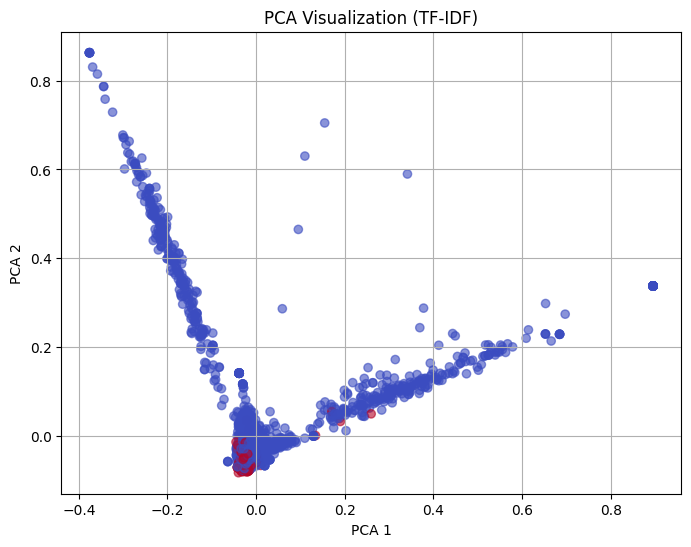

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title("PCA Visualization (TF-IDF)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

# **SECTION 5: t-SNE for Better Clustering**

In [10]:
from sklearn.manifold import TSNE

In [11]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

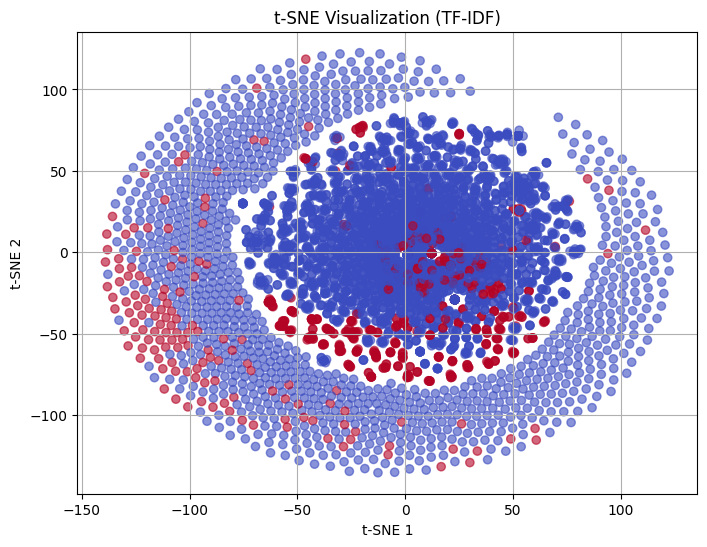

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title("t-SNE Visualization (TF-IDF)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()

# **SECTION 6: What’s Coming Next?**

### What’s Next in Week 12?

You've now **seen your data** — literally — using PCA and t-SNE.

➡️ Next, we’ll go beyond classic ML and jump into **Neural Networks (MLPs)**:  
We'll build our **first deep model** for NLP — powerful and flexible! 🧠🔥

# **SECTION 7: Exercises**

### Exercises:
1. Change the number of PCA components and visualize again.
2. Try different t-SNE `perplexity` values: 10, 30, 50.
3. Use raw CountVectorizer instead of TF-IDF.
4. Try using precomputed embeddings (e.g., from BERT) with t-SNE!